### PROBLEM STATEMENT
    •  Analyze the trend on outstanding amount for the bank 
    •  Is there any relationship between in outstanding amount/ trend with respect to age, education, marriage, credit limit
    •  Does outstanding amount / trend affect the default behavior in next month.


In [1]:
#IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#READING THE EXCEL FILE USING PANDAS
df=pd.read_excel("C:\\Users\\shivareddy\\Downloads\\default_of_credit_card_clients_0.xlsx")

In [52]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEF_PAY,SMID,AGEBIN,total_outstanding,total_payed_amt,rem_bal
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,1,3,1,7704,689,7015
1,2,120000,2,2,2,26,0,2,0,0,...,1000,1000,0,2000,1,4,1,17077,5000,12077
2,3,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,4,2,101653,11018,90635
3,4,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,3,2,231334,8388,222946
4,5,50000,1,2,1,57,0,0,0,0,...,10000,9000,689,679,0,1,4,109339,59049,50290


### DATA UNDERSTANDING (EDA)

In [4]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [6]:
#STATISTICAL SUMMARIES
df[['SEX','EDUCATION','MARRIAGE']].describe()

,SEX,EDUCATION,MARRIAGE
count,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867
std,0.489129,0.790349,0.521970
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,6.000000,3.000000


In [7]:
#ANALYZING DISTRIBUTION FOR BILL AMOUNTS
df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].describe().T

,count,mean,std,min,25%,50%,75%,max
BILL_AMT1,30000.0,51223.330900,73635.860576,-165580.0,3558.75,22381.5,67091.00,964511.0
BILL_AMT2,30000.0,49179.075167,71173.768783,-69777.0,2984.75,21200.0,64006.25,983931.0
BILL_AMT3,30000.0,47013.154800,69349.387427,-157264.0,2666.25,20088.5,60164.75,1664089.0
BILL_AMT4,30000.0,43262.948967,64332.856134,-170000.0,2326.75,19052.0,54506.00,891586.0
BILL_AMT5,30000.0,40311.400967,60797.155770,-81334.0,1763.00,18104.5,50190.50,927171.0
BILL_AMT6,30000.0,38871.760400,59554.107537,-339603.0,1256.00,17071.0,49198.25,961664.0


In [8]:
#ANALYZING DISTRIBUTION FOR PAYMENT DELAYS
df[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].describe().T

,count,mean,std,min,25%,50%,75%,max
PAY_0,30000.0,0.356767,0.760594,0.0,0.0,0.0,0.0,8.0
PAY_2,30000.0,0.320033,0.801727,0.0,0.0,0.0,0.0,8.0
PAY_3,30000.0,0.304067,0.790589,0.0,0.0,0.0,0.0,8.0
PAY_4,30000.0,0.258767,0.761113,0.0,0.0,0.0,0.0,8.0
PAY_5,30000.0,0.221500,0.717720,0.0,0.0,0.0,0.0,8.0
PAY_6,30000.0,0.226567,0.715438,0.0,0.0,0.0,0.0,8.0


### DATA CLEANING

In [9]:
df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [10]:
fill = (df.EDUCATION == 5) | (df.EDUCATION == 6) | (df.EDUCATION == 0)
df.loc[fill,'EDUCATION'] = 4
df.EDUCATION.value_counts()

EDUCATION
2    14030
1    10585
3     4917
4      468
Name: count, dtype: int64

In [11]:
df['MARRIAGE'].unique()

array([1, 2, 3, 0], dtype=int64)

In [12]:
df.loc[df.MARRIAGE ==0, 'MARRIAGE']=3
df.MARRIAGE.value_counts()

MARRIAGE
2    15964
1    13659
3      377
Name: count, dtype: int64

In [13]:
#change 'pay_0' to 'pay_1' and 'default payment next month' to 'def_pay'

In [14]:
df.rename(columns={'PAY_0':'PAY_1' },inplace = True)

In [15]:
df.rename(columns={'default payment next month':'DEF_PAY'},inplace=True)

In [16]:
#to understand the contibution of categorical variables

In [17]:
pd.crosstab(df.SEX,df.DEF_PAY)

DEF_PAY,0,1
SEX,,
1,9015,2873
2,14349,3763


In [18]:
pd.crosstab(df.EDUCATION,df.DEF_PAY)

DEF_PAY,0,1
EDUCATION,,
1,8549,2036
2,10700,3330
3,3680,1237
4,435,33


In [19]:
pd.crosstab(df.MARRIAGE,df.DEF_PAY)

DEF_PAY,0,1
MARRIAGE,,
1,10453,3206
2,12623,3341
3,288,89


In [20]:
def corr_2_cols(co1,co2):
    res = df.groupby([co1,co2]).size().unstack()
    res['perc']=(res[res.columns[1]]/(res[res.columns[0]]+res[res.columns[1]]))
    return res

In [21]:
df['SMID']=0
df.loc[((df.SEX == 1) & (df.MARRIAGE == 1)),'SMID'] =1 #married male
df.loc[((df.SEX == 1) & (df.MARRIAGE == 2)),'SMID'] =2 #single male
df.loc[((df.SEX == 2) & (df.MARRIAGE == 1)),'SMID'] =3 #married female
df.loc[((df.SEX == 2) & (df.MARRIAGE == 2)),'SMID'] =4 #single female
df.loc[((df.SEX == 1) & (df.MARRIAGE == 3)),'SMID'] =5 #male others
df.loc[((df.SEX == 2) & (df.MARRIAGE == 3)),'SMID'] =6 #female others
corr_2_cols('SMID','DEF_PAY')

DEF_PAY,0,1,perc
SMID,,,
1,3844,1346,0.259345
2,5068,1485,0.226614
3,6609,1860,0.219625
4,7555,1856,0.197216
5,103,42,0.289655
6,185,47,0.202586


<Axes: >

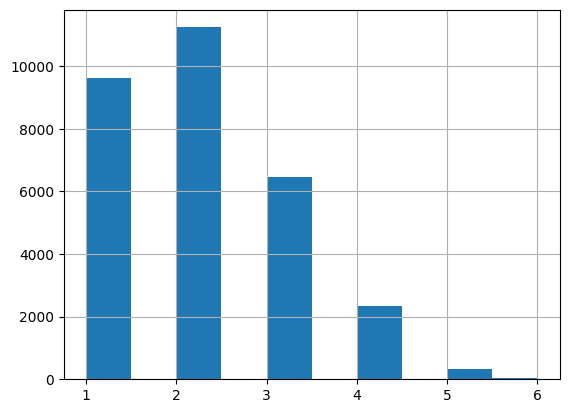

In [22]:
df['AGEBIN']=0
df.loc[((df['AGE']>20) & (df['AGE']<30)),'AGEBIN']=1
df.loc[((df['AGE']>=30) & (df['AGE']<40)),'AGEBIN']=2
df.loc[((df['AGE']>=40) & (df['AGE']<50)),'AGEBIN']=3
df.loc[((df['AGE']>=50) & (df['AGE']<60)),'AGEBIN']=4
df.loc[((df['AGE']>=60) & (df['AGE']<70)),'AGEBIN']=5
df.loc[((df['AGE']>=70) & (df['AGE']<80)),'AGEBIN']=6
df.AGEBIN.hist()

In [23]:
#TREND ON OUTSTANDING AMOUNT OF THE BANK

In [24]:
df['total_outstanding']=df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].sum(axis=1)

In [25]:
df['total_outstanding']=df['total_outstanding'].astype(int)

In [26]:
df['total_outstanding'].describe()

count    3.000000e+04
mean     2.698617e+05
std      3.795643e+05
min     -3.362590e+05
25%      2.868800e+04
50%      1.263110e+05
75%      3.426265e+05
max      5.263883e+06
Name: total_outstanding, dtype: float64

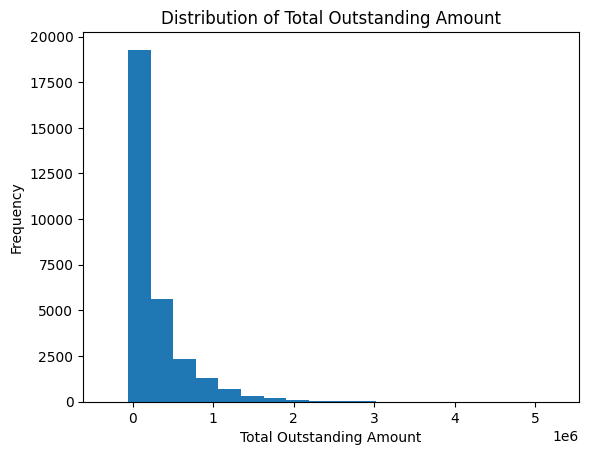

In [27]:
import matplotlib.pyplot as plt
plt.hist(df['total_outstanding'], bins=20)
plt.xlabel('Total Outstanding Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Total Outstanding Amount')
plt.show()

In [28]:
#ANALYSING THE RELATION BETWEEN OUSTANDING TREND / AGE,EDUCATION,MARRIAGE,MARTIAL STATUS

C:\Users\shivareddy\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shivareddy\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shivareddy\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shivareddy\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py

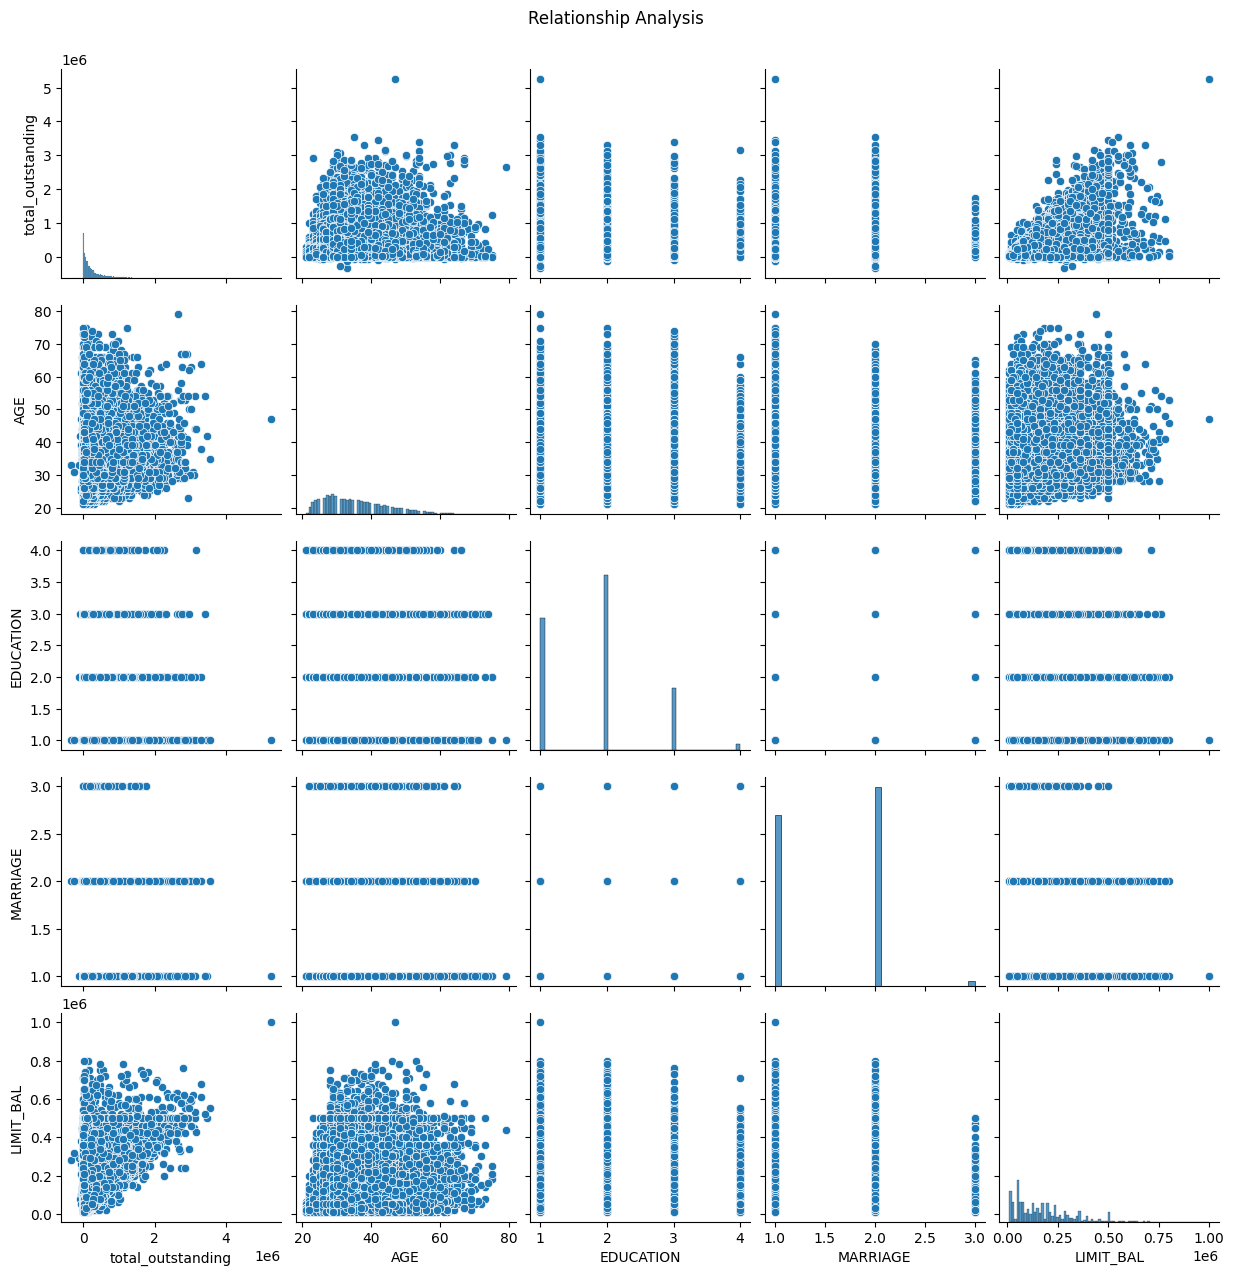

In [29]:
sns.pairplot(df, vars=['total_outstanding', 'AGE', 'EDUCATION', 'MARRIAGE', 'LIMIT_BAL'])
plt.suptitle('Relationship Analysis', y=1.02)
plt.show()

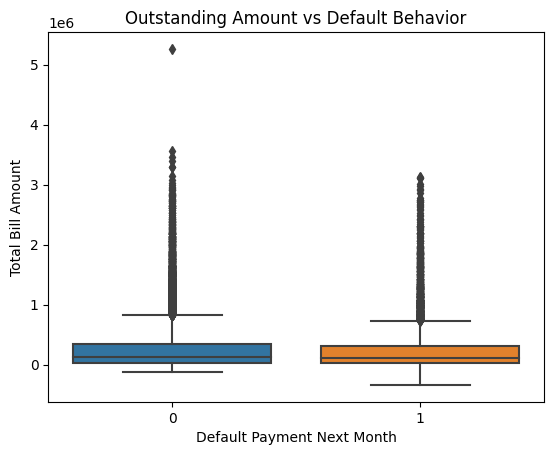

In [30]:
# outstanding amount/trend affect default behavior in the next month
sns.boxplot(x='DEF_PAY', y='total_outstanding', data=df)
plt.title('Outstanding Amount vs Default Behavior')
plt.xlabel('Default Payment Next Month')
plt.ylabel('Total Bill Amount')
plt.show()

In [31]:
import numpy as np
import scipy.stats as stats

# Calculate the mean and standard deviation of the total outstanding amount for both groups
mean_no_default = df[df['DEF_PAY'] == 0]['total_outstanding'].mean()
std_no_default = df[df['DEF_PAY'] == 0]['total_outstanding'].std()
mean_default = df[df['DEF_PAY'] == 1]['total_outstanding'].mean()
std_default = df[df['DEF_PAY'] == 1]['total_outstanding'].std()

print('Mean (No Default):', mean_no_default)
print('Standard Deviation (No Default):', std_no_default)
print('Mean (Default):', mean_default)
print('Standard Deviation (Default):', std_default)

Mean (No Default): 272428.90784968325
Standard Deviation (No Default): 377751.92949333106
Mean (Default): 260822.95554550935
Standard Deviation (Default): 385770.53471808584


In [53]:
#CONFIDENCE INTERVEAL

In [32]:
# Calculate the 95% confidence interval for the mean total outstanding amount for both groups
conf_int_no_default = stats.t.interval(0.95, len(df[df['DEF_PAY'] == 0]['total_outstanding'])-1,
                                       loc=mean_no_default, scale=stats.sem(df[df['DEF_PAY'] == 0]['total_outstanding']))
conf_int_default = stats.t.interval(0.95, len(df[df['DEF_PAY'] == 1]['total_outstanding'])-1,
                                    loc=mean_default, scale=stats.sem(df[df['DEF_PAY'] == 1]['total_outstanding']))

print('95% Confidence Interval (No Default):', conf_int_no_default)
print('95% Confidence Interval (Default):', conf_int_default)

95% Confidence Interval (No Default): (267584.9128788843, 277272.9028204822)
95% Confidence Interval (Default): (251539.63841330487, 270106.27267771383)


In [55]:
#HYPOTHESIS TESTING
''''- H0(NULL HYPOTHESIS)-> There is no difference in mean outstanding amt between clients who is default and not default
    - Ha(ALTERNATE HYPOTHESIS)-> There is a significance difference''''

In [33]:
# Perform a two-sample t-test
t_stat, p_value = stats.ttest_ind(df[df['DEF_PAY'] == 0]['total_outstanding'],
                                df[df['DEF_PAY'] == 1]['total_outstanding'],
                                equal_var=False)  # Welch's t-test

print('T-statistic:', t_stat)
print('P-value:', p_value)

T-statistic: 2.1727162031718863
P-value: 0.02982393146535634


### FEATURE ENGINEERING

In [34]:
df['total_payed_amt']=df[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].sum(axis=1)

In [35]:
df['total_payed_amt'].describe()

count    3.000000e+04
mean     3.165139e+04
std      6.082768e+04
min      0.000000e+00
25%      6.679750e+03
50%      1.438300e+04
75%      3.350350e+04
max      3.764066e+06
Name: total_payed_amt, dtype: float64

In [36]:
#total_payed=df[df['total_outstanding']==df['total_payed_amt']]['ID']

In [37]:
#total_payed.info()

In [38]:
#total_payed

In [39]:
#total_payed.head(5)

In [40]:
df['rem_bal']=df['total_outstanding'] - df['total_payed_amt']

In [41]:
df['rem_bal'].value_counts()

rem_bal
0         1402
390         69
2500        33
14400       29
1170        25
          ... 
6571         1
161435       1
35467        1
211936       1
119430       1
Name: count, Length: 26317, dtype: int64

In [42]:
def detect_outliers_zscore(df):
    z_scores = np.abs((df - df.mean()) / df.std())
    return z_scores > 3
outlier_counts = detect_outliers_zscore(df).sum(axis=1)
outlier = df[outlier_counts > 3]
outliers_mask = detect_outliers_zscore(df)
outliers = df[outliers_mask.any(axis=1)]
cleaned_data = df[~outliers_mask.any(axis=1)]

In [43]:
outliers

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEF_PAY,SMID,AGEBIN,total_outstanding,total_payed_amt,rem_bal
6,7,500000,1,1,2,29,0,0,0,0,...,38000,20239,13750,13770,0,2,1,2724595,180759,2543836
12,13,630000,2,2,2,41,0,0,0,0,...,6500,6500,2870,0,0,4,3,41007,23370,17637
17,18,320000,1,1,1,49,0,0,0,0,...,75940,20000,195599,50000,0,1,3,966014,361897,604117
33,34,500000,2,2,1,54,0,0,0,0,...,7521,71439,981,51582,0,3,4,125744,158502,-32758
40,41,360000,1,1,2,33,0,0,0,0,...,6000,188840,28000,4000,0,2,2,1650751,243840,1406911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29988,29989,250000,1,1,1,34,0,0,0,0,...,9011,6000,7000,6009,0,1,2,1376070,101820,1274250
29991,29992,210000,1,2,1,34,3,2,2,2,...,0,0,0,0,1,1,2,15000,0,15000
29993,29994,100000,1,1,2,38,0,0,0,0,...,4000,3000,2000,2000,0,2,2,302568,124784,177784
29997,29998,30000,1,2,2,37,4,3,2,0,...,22000,4200,2000,3100,1,2,2,70496,31300,39196


In [44]:
cleaned_data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEF_PAY,SMID,AGEBIN,total_outstanding,total_payed_amt,rem_bal
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,1,3,1,7704,689,7015
1,2,120000,2,2,2,26,0,2,0,0,...,1000,1000,0,2000,1,4,1,17077,5000,12077
2,3,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,4,2,101653,11018,90635
3,4,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,3,2,231334,8388,222946
4,5,50000,1,2,1,57,0,0,0,0,...,10000,9000,689,679,0,1,4,109339,59049,50290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29992,29993,10000,1,3,1,43,0,0,0,0,...,0,0,0,0,0,1,3,19202,2000,17202
29994,29995,80000,1,2,2,34,2,2,2,2,...,0,7000,0,4000,1,2,2,470933,21500,449433
29995,29996,220000,1,3,1,39,0,0,0,0,...,5003,3047,5000,1000,0,1,2,725349,42550,682799
29996,29997,150000,1,3,2,43,0,0,0,0,...,8998,129,0,0,0,2,3,21182,14490,6692


### TRAINING AND TESTING THE ALGORITHM

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

X = cleaned_data.drop('DEF_PAY', axis=1)
y = cleaned_data['DEF_PAY']

#### SPLITTING THE DATA INTO TRAIN AND TEST

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [47]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
#SELECTING THE TOP 10 FEATURES WHICH SUITS THE ALGORITHM
selector = SelectKBest(f_classif, k=10)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

In [49]:
#EVALUATING THE ALGORITHM
model = LogisticRegression()
model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8227579556412729
              precision    recall  f1-score   support

           0       0.84      0.96      0.89      4075
           1       0.68      0.32      0.44      1110

    accuracy                           0.82      5185
   macro avg       0.76      0.64      0.67      5185
weighted avg       0.81      0.82      0.80      5185



In [51]:
# Evaluate training accuracy
train_predictions = model.predict(X_train_selected)
train_accuracy = accuracy_score(y_train, train_predictions)
print("Training Accuracy:", train_accuracy)

# Evaluate test accuracy
test_predictions = model.predict(X_test_selected)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Test Accuracy:", test_accuracy) 


Training Accuracy: 0.8212770061728395
Test Accuracy: 0.8227579556412729
